<h2>Desafio 4 - Trabajo Final</h2>

<h3>Grupo 7</h3>
<ul>
    <li>Ignacio Mendieta</li>
    <li>Laura Jazmín Chao</li>
    <li>Juan Nicolás Capistrano</li>
    <li>Betiana Srur</li>
    <li>Marecelo Carrizo</li>
    
</ul>
<h3>Modelo de regresión Lineal y Análisis de componentes principales



<a id="section_toc"></a> 
<h2> Tabla de Contenidos </h2>

[Librerías](#section_import)

[Dataset](#section_dataset)

[Preprocesamiento de los datos](#section_prepro)

[Modelado de regresión lineal múltiple](#section_linreg)

[Testeo con Grid Search y Cross Validation](#section_grid)

[Testeo con Regularización Ridge y Lasso](#section_lasso_ridge)

[Análisis de componentes princiales](#section_pca)

[Regresión sobre componentes princiales](#section_linreg_pca)

[Comparación de métricas](#section_metrics)

<a id="section_import"></a> 
<h3>Librerías</h3>

[volver a TOC](#section_toc)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [96]:
from sklearn.preprocessing import OneHotEncoder

In [97]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV

In [99]:
from sklearn.decomposition import PCA

<a id="section_dataset"></a> 
<h3>Dataset</h3>

[volver a TOC](#section_toc)

In [8]:
df = pd.read_csv('Data/co2_emissions_clean.csv')

In [9]:
df.shape

(406, 12)

In [10]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,RENAULT,FLUENCE 2.0 16V,4 Puertas,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,RENAULT,DUSTER 2.0 16v,5 Puertas,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,5 Puertas,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,CITROËN,DS4,Coupe,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


### Evaluar si dejar esta parte

In [ ]:
def train_test_rmse(feature_cols):
    X = df[feature_cols]
    y = df.emision_CO2
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True , random_state = 40)
    print (X_train.shape, y_train.shape) 
    print (X_test.shape, y_test.shape)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
features_columnas = [ 'vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']

In [ ]:
print (train_test_rmse( features_cols))

In [ ]:
print (linreg.intercept_)
print (linreg.coef_)

In [ ]:
print ('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print ('MSE:', metrics.mean_squared_error(y_test,y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
print ('R2:', metrics.r2_score(y_test, y_pred))

In [ ]:
graf_lineal_model(X, y_test, y_pred)

<a id="section_prepro"></a> 
<h3>Preprocesamiento de los datos</h3>

[volver a TOC](#section_toc)

In [12]:
df.columns

Index(['vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_cilindrada', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'emision_CO2',
       'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto'],
      dtype='object')

In [13]:
categorical_columns = ['vehiculo_tipo','vehiculo_marca', 'vehiculo_traccion', 'vehiculo_tipo_transmision', 'vehiculo_standard_emision',
   'vehiculo_tipo_combustible']

In [14]:
encoder_categories = []

for col in categorical_columns:    
    col_categories = df[col].unique()
    encoder_categories.append(col_categories)

encoder_categories

[array(['SUV', '4 Puertas', '5 Puertas', 'Coupe', 'Chasis Largo',
        'PICK UP', 'Furgon', 'Camion', '4x4', 'SEDÁN 3 PUERTAS COUPÉ',
        'Rural', 'BUS', 'PICK UP CABINA SIMPLE DOBLE',
        'SUV \x96 CROSSOVER 4 PUERTAS CON PORTÓN TRASERO',
        'BERLINA 4 PUERTAS Y PORTÓN TRASERO',
        'RURAL 4 PUERTAS CON PORTÓN TRASERO / SEDÁN 2 PUERTAS CON PORTÓN TRASERO',
        'SEDÁN 5 PUERTAS (HATCHBACK)'], dtype=object),
 array(['TOYOTA', 'RENAULT', 'CITROËN', 'LEXUS', 'PEUGEOT', 'FORD',
        'PEUGEOT / CITROËN', 'HYUNDAI', 'SUZUKI', 'CHEVROLET', 'LIFAN',
        'BMW', 'CITROËN / DS', 'HONDA', 'NISSAN', 'FIAT', 'CHERY',
        'VOLKSWAGEN', 'ALFA ROMEO', 'FAW', 'MERCEDES-BENZ', 'JEEP',
        'LAND ROVER', 'JAC', 'VOLVO', 'SHINERAY', 'CHANGAN', 'DS', 'MINI',
        'DOMY', 'BORGWARD', 'PORSCHE', 'AUDI', 'BAIC', 'ZANELLA', 'RAM',
        'FOTON', 'MASERATI', 'SUBARU', 'HAVAL', 'ISUZU', 'DONGFENG',
        'MERCEDES-AMG', 'MITSUBISHI', 'ZOTYE', 'KIA', 'GREAT WALL', 'KYC'

In [16]:
encoder = OneHotEncoder(categories = encoder_categories, sparse=False)
encoder = encoder.fit(df[categorical_columns])

In [17]:
X_encoded = encoder.transform(df[categorical_columns])

In [18]:
X_dummies = pd.DataFrame(X_encoded, columns = encoder.get_feature_names(categorical_columns))
X_dummies

,vehiculo_tipo_SUV,vehiculo_tipo_4 Puertas,vehiculo_tipo_5 Puertas,vehiculo_tipo_Coupe,vehiculo_tipo_Chasis Largo,vehiculo_tipo_PICK UP,vehiculo_tipo_Furgon,vehiculo_tipo_Camion,vehiculo_tipo_4x4,vehiculo_tipo_SEDÁN 3 PUERTAS COUPÉ,...,vehiculo_standard_emision_EURUO V,vehiculo_standard_emision_EURO VI a,vehiculo_standard_emision_EURO V,vehiculo_standard_emision_EURO VI c,vehiculo_standard_emision_EURO VI d,vehiculo_standard_emision_EURO VI b,vehiculo_tipo_combustible_GAS OIL,vehiculo_tipo_combustible_NAFTA,vehiculo_tipo_combustible_NAFTA / ELECTRICIDAD,vehiculo_tipo_combustible_DIESEL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
403,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
404,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
X_numerical = df[['vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']]

In [20]:
#X = pd.concat([df, X_dummies], axis = 1)
X = pd.concat([X_numerical, X_dummies], axis = 1)

In [21]:
X.shape

(406, 92)

In [22]:
X.head()

,vehiculo_cilindrada,consumo_urbano,consumo_extraurbano,consumo_mixto,vehiculo_tipo_SUV,vehiculo_tipo_4 Puertas,vehiculo_tipo_5 Puertas,vehiculo_tipo_Coupe,vehiculo_tipo_Chasis Largo,vehiculo_tipo_PICK UP,...,vehiculo_standard_emision_EURUO V,vehiculo_standard_emision_EURO VI a,vehiculo_standard_emision_EURO V,vehiculo_standard_emision_EURO VI c,vehiculo_standard_emision_EURO VI d,vehiculo_standard_emision_EURO VI b,vehiculo_tipo_combustible_GAS OIL,vehiculo_tipo_combustible_NAFTA,vehiculo_tipo_combustible_NAFTA / ELECTRICIDAD,vehiculo_tipo_combustible_DIESEL
0,4461.0,11.56,8.94,9.90,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1997.0,10.50,6.10,7.70,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1998.0,11.13,6.98,8.52,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1998.0,11.20,7.01,8.55,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1598.0,10.60,6.00,7.70,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
y = df.emision_CO2

In [24]:
y.shape

(406,)

<a id="section_linreg"></a> 
<h3>Modelado de regresión lineal múltiple</h3>

[volver a TOC](#section_toc)

In [25]:
# Instanciamos el modelo
linreg = LinearRegression()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 40)

In [27]:
# Entrenamos el modelo 
linreg.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = linreg.predict(X_test)

In [87]:
from sklearn import metrics

In [88]:
reg_metrics = pd.Series([
                metrics.mean_absolute_error(y_test, y_pred), 
                metrics.mean_squared_error(y_test, y_pred),
                np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                metrics.r2_score(y_test, y_pred)])


reg_metrics.index = ['Mean Absolute Error (MAE):', 'Mean Squared Error (MSE):', 'RMSE:', 'R2:']

print(reg_metrics)

Mean Absolute Error (MAE):     8.90
Mean Squared Error (MSE):    144.03
RMSE:                         12.00
R2:                            0.93
dtype: float64


In [32]:
## Agregar las labels y modificar colores!!!

def graf_lineal_model(y, y_pred):
    # Graficamos el modelo
    plt.scatter(y_pred, y, s=30, alpha=0.4, c='b')
    plt.plot(y,y, '-.',c='g')
    plt.show()
    print(y.shape)
    print(y_pred.shape)
    return

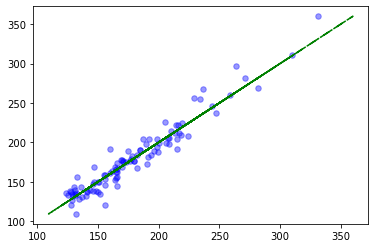

(102,)
(102,)


In [34]:
graf_lineal_model(y_test, y_pred)

<a id="section_grid"></a> 
<h3>Testeo con Gridsearch y CrossValidation</h3>

[volver a TOC](#section_toc)

In [36]:

model = LinearRegression()
parameters = {'fit_intercept':[True], 'normalize':[True],}

grid = GridSearchCV(model,parameters, cv=3)
grid.fit(X_train, y_train)

print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"% np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  -8.264735373294696e+26
Residual sum of squares: 336729751424175770517372928.00


In [37]:
reg = LinearRegression()
parameters = {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False')}
clf3 = GridSearchCV(reg, parameters)
clf3.fit(X, y)
print ("r2 / variance : ", grid.best_score_)

r2 / variance :  -8.264735373294696e+26


In [38]:
scores = cross_val_score(reg, X_train, y_train, cv = 5) #cv is the number of folds, scores will give an array of scores
print (scores, np.mean(scores), np.std(scores))
print ('R2:', metrics.r2_score(y_test, y_pred))

[ 8.60986837e-01 -4.34376565e+00  6.87584689e-01 -2.91368720e+03
  8.76054341e-01] -583.121268008112 1165.2846763604566
R2: 0.9278281892297293


In [45]:
predictions = cross_val_predict(reg, X_test, y_test, cv = 5)
#predictions
#accuracy = metrics.r2_scores(y_test, predictions)
print ('R2:', metrics.r2_score(y_test, predictions))

R2: 0.9824629097891908


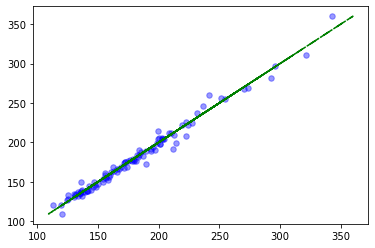

(102,)
(102,)


In [47]:
 graf_lineal_model(y_test, predictions)

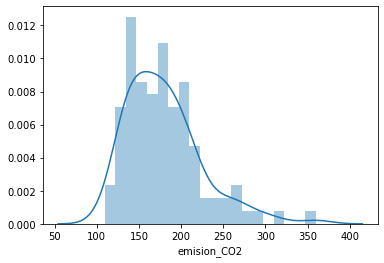

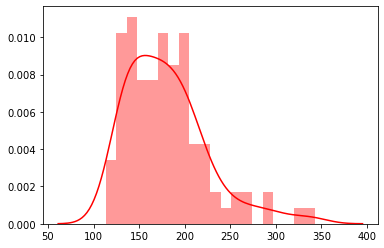

In [48]:
sns.distplot(y_test, bins = 20)
plt.show()
sns.distplot(predictions, bins = 20, color = 'red')
plt.show()

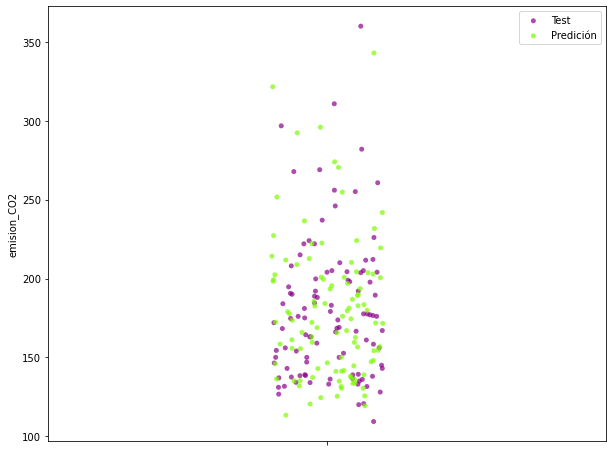

In [49]:
f, ax = plt.subplots(1, figsize=(10, 8), sharex=True)

sns.stripplot(y = y_test, color = 'darkmagenta', alpha = 0.7, label = 'Test')
sns.stripplot(y = predictions, color = 'lawngreen', alpha = 0.7, label = 'Predición')
plt.legend()
plt.show()

<a id="section_lasso_ridge"></a> 
<h3>Testeo con Regularización Ridge y Lasso</h3>

[volver a TOC](#section_toc)

In [55]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [89]:
lasso_metrics = pd.Series([
                metrics.mean_absolute_error(y_test, y_pred_lasso), 
                metrics.mean_squared_error(y_test, y_pred_lasso),
                np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),
                metrics.r2_score(y_test, y_pred_lasso)])


lasso_metrics.index = ['Mean Absolute Error (MAE):', 'Mean Squared Error (MSE):', 'RMSE:', 'R2:']

print(lasso_metrics)

Mean Absolute Error (MAE):     8.32
Mean Squared Error (MSE):    129.13
RMSE:                         11.36
R2:                            0.94
dtype: float64


In [58]:
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)





In [90]:
ridge_metrics = pd.Series([
                metrics.mean_absolute_error(y_test, y_pred_ridge), 
                metrics.mean_squared_error(y_test, y_pred_ridge),
                np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)),
                metrics.r2_score(y_test, y_pred_ridge)])


ridge_metrics.index = ['Mean Absolute Error (MAE):', 'Mean Squared Error (MSE):', 'RMSE:', 'R2:']

print(ridge_metrics)

Mean Absolute Error (MAE):     8.79
Mean Squared Error (MSE):    139.73
RMSE:                         11.82
R2:                            0.93
dtype: float64


<a id="section_pca"></a> 
<h3>Análisis de componentes principales</h3>

[volver a TOC](#section_toc)

In [68]:
model_pca = PCA(4).fit(X)

In [69]:
pca_loadings = pd.DataFrame(model_pca.components_.T, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'],)
pca_loadings

,PC1,PC2,PC3,PC4
vehiculo_cilindrada,1.00,0.00,-0.00,-0.00
consumo_urbano,0.00,-0.00,1.00,-0.06
consumo_extraurbano,0.00,0.00,0.06,0.94
consumo_mixto,-0.00,1.00,0.00,-0.00
vehiculo_tipo_SUV,0.00,-0.00,-0.00,0.03
...,...,...,...,...
vehiculo_standard_emision_EURO VI b,-0.00,-0.00,-0.00,-0.00
vehiculo_tipo_combustible_GAS OIL,0.00,-0.00,-0.01,0.08
vehiculo_tipo_combustible_NAFTA,-0.00,0.00,0.02,-0.02
vehiculo_tipo_combustible_NAFTA / ELECTRICIDAD,0.00,-0.00,-0.01,-0.05


In [70]:
# Para evitar notación científica en pandas

pd.options.display.float_format = '{:.2f}'.format

In [71]:
pca_loadings.T.dot(pca_loadings)
# multiplico matrices (producto interno) para calcular la covarianza entre PC1, PC2 y demás.

,PC1,PC2,PC3,PC4
PC1,1.00,-0.00,0.00,0.00
PC2,-0.00,1.00,0.00,-0.00
PC3,0.00,0.00,1.00,0.00
PC4,0.00,-0.00,0.00,1.00


In [72]:
df_pca = pd.DataFrame(model_pca.fit_transform(X),index=X.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca.head()

,PC1,PC2,PC3,PC4
0,2376.53,1.18,-3.49,0.44
1,-87.47,-1.60,0.62,-0.36
2,-86.47,-0.78,1.31,0.61
3,-86.46,-0.75,1.38,0.90
4,-486.47,-1.69,1.60,-0.04


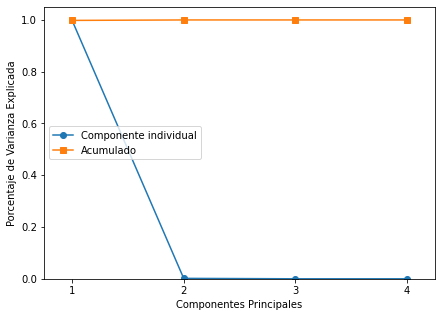

In [73]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], model_pca.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot([1,2,3,4], np.cumsum(model_pca.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=6);

In [74]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');
        

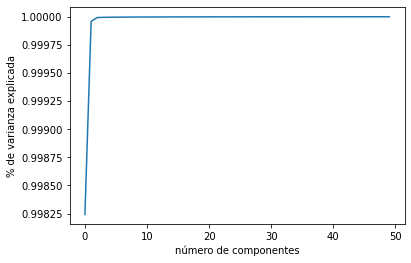

In [76]:
plot_explained_variance(components_count = 50, X = X)

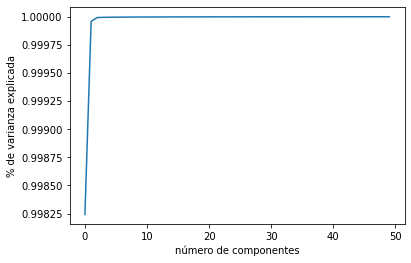

In [77]:
plot_explained_variance(components_count = 50, X = X)

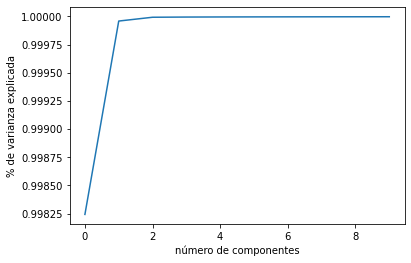

In [78]:
plot_explained_variance(components_count = 10, X = X)

<a id="section_linreg_pca"></a> 
<h3>Regresión sobre componentes principales</h3>

[volver a TOC](#section_toc)

In [79]:
model_pca2 = PCA(30).fit(X_train)
X_train_PCA = model_pca.transform(X_train)
X_test_PCA = model_pca.transform(X_test)

In [80]:
linreg_pca = linear_model.LinearRegression()
linreg_pca.fit(X_train_PCA, y_train)
# linear_fit
y_pred_pca = linreg_pca.predict(X_test_PCA)


In [91]:
reg_pca_metrics = pd.Series([
                metrics.mean_absolute_error(y_test, y_pred_pca), 
                metrics.mean_squared_error(y_test, y_pred_pca),
                np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)),
                metrics.r2_score(y_test, y_pred_pca)])


reg_pca_metrics.index = ['Mean Absolute Error (MAE):', 'Mean Squared Error (MSE):', 'RMSE:', 'R2:']

print(reg_pca_metrics)

Mean Absolute Error (MAE):     9.20
Mean Squared Error (MSE):    164.87
RMSE:                         12.84
R2:                            0.92
dtype: float64


In [92]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train_PCA, y_train)
y_pred_pca_lasso = lasso.predict(X_test_PCA)

lasso_pca_metrics = pd.Series([
                metrics.mean_absolute_error(y_test, y_pred_pca_lasso), 
                metrics.mean_squared_error(y_test, y_pred_pca_lasso),
                np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca_lasso)),
                metrics.r2_score(y_test, y_pred_pca_lasso)])


lasso_pca_metrics.index = ['Mean Absolute Error (MAE):', 'Mean Squared Error (MSE):', 'RMSE:', 'R2:']

print(lasso_pca_metrics)

Mean Absolute Error (MAE):     9.22
Mean Squared Error (MSE):    165.52
RMSE:                         12.87
R2:                            0.92
dtype: float64


In [93]:
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train_PCA, y_train)
y_pred_pca_ridge = ridge.predict(X_test_PCA)

ridge_pca_metrics = pd.Series([
                metrics.mean_absolute_error(y_test, y_pred_pca_ridge), 
                metrics.mean_squared_error(true_values, y_pred_pca_ridge),
                np.sqrt(metrics.mean_squared_error(true_values, y_pred_pca_ridge)),
                metrics.r2_score(true_values, y_pred_pca_ridge)])


ridge_pca_metrics.index = ['Mean Absolute Error (MAE):', 'Mean Squared Error (MSE):', 'RMSE:', 'R2:']

print(ridge_pca_metrics)

Mean Absolute Error (MAE):     9.20
Mean Squared Error (MSE):    164.91
RMSE:                         12.84
R2:                            0.92
dtype: float64


<a id="section_metrics"></a> 
<h3>Comparación de métricas</h3>

[volver a TOC](#section_toc)

In [94]:
metrics = pd.DataFrame([reg_metrics, lasso_metrics, ridge_metrics, 
                        reg_pca_metrics, lasso_pca_metrics, ridge_pca_metrics ])
metrics.index = ["regresion lineal", "lasso", "ridge", "pca - regresion lineal", "pca - lasso", "pca - ridge"]
metrics

,Mean Absolute Error (MAE):,Mean Squared Error (MSE):,RMSE:,R2:
regresion lineal,8.90,144.03,12.00,0.93
lasso,8.32,129.13,11.36,0.94
ridge,8.79,139.73,11.82,0.93
pca - regresion lineal,9.20,164.87,12.84,0.92
pca - lasso,9.22,165.52,12.87,0.92
pca - ridge,9.20,164.91,12.84,0.92
